# Homework 02
https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/02-regression/homework.md

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-17 14:44:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.1s    

2022-09-17 14:44:14 (9.61 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("housing.csv")

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:>

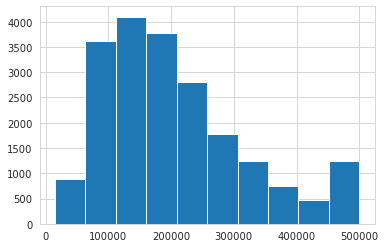

In [8]:
df["median_house_value"].hist()

In [9]:
housing = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]]

In [10]:
housing.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [11]:
housing.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [12]:
housing["population"].median()

1166.0

In [13]:
np.random.seed(42)

In [14]:
m =len(housing)
idx = np.arange(m)
np.random.shuffle(idx)

In [15]:
m_val = int(m * 0.2)
m_test = int(m * 0.2)
m_train = m - m_val - m_test

In [16]:
m == m_val + m_test + m_train

True

In [17]:
housing_train = housing.iloc[idx[:m_train]]
housing_val = housing.iloc[idx[m_train:m_train+m_val]]
housing_test = housing.iloc[idx[m_train+m_val:]]

In [18]:
housing_train = housing_train.reset_index(drop=True)
housing_val = housing_val.reset_index(drop=True)
housing_test = housing_test.reset_index(drop=True)

In [19]:
y_train = housing_train["median_house_value"]
y_val = housing_val["median_house_value"]
y_test = housing_test["median_house_value"]

In [20]:
del housing_train["median_house_value"]
del housing_val["median_house_value"]
del housing_test["median_house_value"]

In [21]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

<AxesSubplot:>

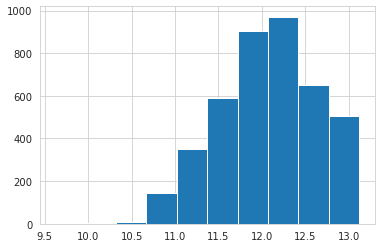

In [22]:
y_val.hist()

In [23]:
total_bedrooms_median = housing_train["total_bedrooms"].median()

In [24]:
housing_train_fill_zero = housing_train.fillna(0)

In [25]:
housing_train_fill_median = housing_train.fillna(total_bedrooms_median)

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [27]:
w0_z, w_z = train_linear_regression(housing_train_fill_zero, y_train)

In [28]:
w0_m, w_m = train_linear_regression(housing_train_fill_median, y_train)

In [29]:
y_pred_z = w0_z + housing_val.dot(w_z)

In [30]:
y_pred_m = w0_m + housing_val.dot(w_m)

In [31]:
import seaborn as sns

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

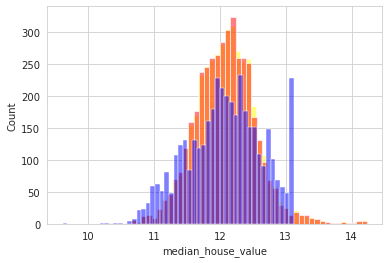

In [32]:
sns.histplot(y_pred_z, color="yellow", alpha=0.5, bins=50)
sns.histplot(y_pred_m, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

In [33]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [34]:
rmse(y_val, y_pred_z), rmse(y_val, y_pred_m)

(0.3295330365233302, 0.3290501842140677)

In [214]:
round(rmse(y_val, y_pred_z), 2) == round(rmse(y_val, y_pred_m), 2)

True

In [215]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [216]:
resluts = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(housing_train_fill_zero, y_train, r)
    pred = w0 + housing_val.dot(w)
    resluts[r] = rmse(y_val, pred)

In [217]:
res_df = pd.DataFrame.from_dict(resluts, orient='index', columns=["rmse"])

In [218]:
res_df.sort_values("rmse")

,rmse
0.010000,0.329532
0.001000,0.329533
0.000100,0.329533
0.000001,0.329533
0.000000,0.329533
0.100000,0.329695
1.000000,0.333789
5.000000,0.339249
10.000000,0.340606


In [219]:
res_df0 = pd.DataFrame(resluts.items(), columns=['r', 'rmse'])
res_df0.sort_values("rmse")

,r,rmse
4,0.010000,0.329532
3,0.001000,0.329533
2,0.000100,0.329533
1,0.000001,0.329533
0,0.000000,0.329533
5,0.100000,0.329695
6,1.000000,0.333789
7,5.000000,0.339249
8,10.000000,0.340606


In [251]:
def get_rmse(df_orig, seed, y_col, filler):
    df = df_orig.copy()
    np.random.seed(seed)

    m = len(df)
    idx = np.arange(m)
    np.random.shuffle(idx)
    m_val = int(m * 0.2)
    m_test = int(m * 0.2)
    m_train = m - m_val - m_test

    df_train = df.iloc[idx[:m_train]]
    df_val = df.iloc[idx[m_train:m_train + m_val]]
    df_test = df.iloc[idx[m_train + m_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train[y_col]
    y_val = df_val[y_col]
    y_test = df_test[y_col]

    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    del df_train[y_col]
    del df_val[y_col]
    del df_test[y_col]

    df_train_fill_zero = df_train.fillna(0)
    w0, w = train_linear_regression(df_train_fill_zero, y_train)
    pred = w0 + df_val.dot(w)
    return rmse(y_val, pred)

In [255]:
res_seed = {}

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    res_seed[seed] = get_rmse(housing, seed, "median_house_value", 0)


In [256]:
res_seed_df = pd.DataFrame(res_seed.items(), columns=['seed', 'rmse'])

In [261]:
std = np.std(res_seed_df['rmse'])
print(std, round(std, 3))

0.004338750837488881 0.004


## Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [258]:
def get_rmse_test(df_orig, seed, y_col, filler, r):
    df = df_orig.copy()
    np.random.seed(seed)
    m = len(df)
    idx = np.arange(m)
    np.random.shuffle(idx)

    m_val = int(m * 0.2)
    m_test = int(m * 0.2)
    m_train = m - m_val - m_test

    df_train = df.iloc[idx[:m_train]]
    df_val = df.iloc[idx[m_train:m_train + m_val]]
    df_test = df.iloc[idx[m_train + m_val:]]

    df_combine = pd.concat([df_train, df_val])

    df_combine = df_combine.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train[y_col]
    y_val = df_val[y_col]
    y_test = df_test[y_col]

    y_combine = pd.concat([y_train, y_val])

    y_combine = np.log1p(y_combine)
    y_test = np.log1p(y_test)

    del df_combine[y_col]
    del df_test[y_col]

    df_train_fill_zero = df_combine.fillna(0)
    w0, w = train_linear_regression_reg(df_train_fill_zero, y_combine, r)
    pred = w0 + df_test.dot(w)
    return rmse(y_test, pred)

In [259]:
get_rmse_test(housing, 9, "median_house_value", 0, 0.001)

0.34516008528872244